# Classification

![Data Science Workflow](img/ds-workflow.png)

## What is Classification?
- A **Machine Learing** algorithm
- Try to classify rows of data into categories (classes)

## Machine Learning
### Machine Learning with Python – for Beginners

[**Machine Learning with Python is a 10+ hours FREE course**](https://www.learnpythonwithrune.org/machine-learning/)
– a journey from zero to mastery.
- The course consist of the following content.
    - **15 video lessons** – which explain Machine Learning concepts, demonstrate models on real data, introduce projects and show a solution.
    - **30 JuPyter Notebooks** – with the full code and explanation from the lectures and projects (GitHub).
    - **15 projects** – with step guides to help you structure your solutions and solution explained in the end of video lessons.

## What is Machine Learning?

![Machine Learning](img/machine_learning.png)

- In the **classical computing model** every thing is programmed into the algorithms. 
    - This has the limitation that all decision logic need to be understood before usage. 
    - And if things change, we need to modify the program.
- With the **modern computing model (Machine Learning)** this paradigm is changes. 
    - We feed the algorithms (models) with data.
    - Based on that data, the algorithms (models) make decisions in the program.

## How Machine Learning Works

### Phase 1: Learning

![ML Learning](img/ml_process.png)

- **Get Data**: Identify relevant data for the problem you want to solve. This data set should represent the type of data that the Machine Learn model will use to predict from in Phase 2 (predction).
- **Pre-processing**: This step is about cleaning up data. While the Machine Learning is awesome, it cannot figure out what good data looks like. You need to do the cleaning as well as transforming data into a desired format.
- **Train model**: This is where the magic happens, the learning step (Train model). There are three main paradigms in machine learning.
    - **Supervised**: where you tell the algorithm what categories each data item is in. Each data item from the training set is tagged with the right answer.
    - **Unsupervised**: is when the learning algorithm is not told what to do with it and it should make the structure itself.
    - **Reinforcement**: teaches the machine to think for itself based on past action rewards.
- **Test model**: Finally, the testing is done to see if the model is good. The training data was divided into a test set and training set. The test set is used to see if the model can predict from it. If not, a new model might be necessary.

### Phase 2: Prediction

![ML Prediction](img/ml_prediction.png)

## Supervised Learning
 - Given a dataset of input-output pairs, learn a function to map inputs to outputs
 - There are different tasks - but we start to focus on **Classification**
 
 
 ### Classification
 - **Supervised learning**: the task of learning a function mapping an input point to a descrete category

### Example: Iris Flower Dataset
- [Kaggle Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
- Consists of three classes: `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`
- Given depedent features can we predict class

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('files/iris.csv', index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Machine Leaning
- A Few Machine Learning Models
    - [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) C-Support Vector Classification.
    - [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Classifier implementing the k-nearest neighbors vote.
- Steps
    - **Step 1**: Assign independent features (those predicting) to `X`
    - **Step 2**: Assign classes (labels/dependent features) to `y`
    - **Step 3**: Divide into training and test sets
    Python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    - **Step 4**: Create the model
    Python
svc = SVC()

    - **Step 5**: Fit the model
    Python
svc.fit(X_train, y_train)

    - **Step 6**: Predict with the model
    Python
y_pred = svc.predict(X_test)

    - **Step 7**: Test the accuracy
    Python
accuracy_score(y_test, y_pred)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
X = data.drop('Species', axis=1)
y = data['Species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Finding most important feature
- [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) Permutation importance for feature evaluation.
- Use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [8]:
from sklearn.inspection import permutation_importance

In [9]:
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances_mean

array([0.        , 0.        , 0.61333333, 0.18666667])

### Visualize the features by importance
- The most important features are given by `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- To visualize it we can create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

<AxesSubplot:>

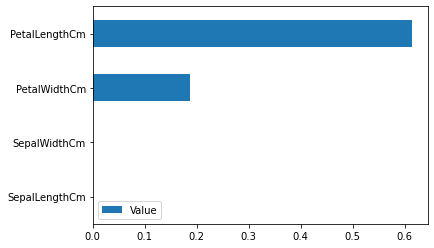

In [10]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

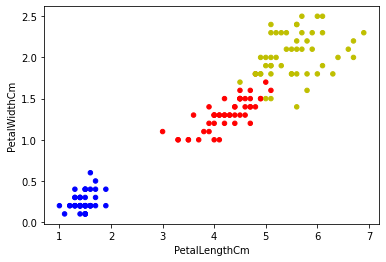

In [11]:
color_map = {'Iris-setosa': 'b', 'Iris-versicolor': 'r', 'Iris-virginica': 'y'}

colors = data['Species'].apply(lambda x: color_map[x])

data.plot.scatter(x='PetalLengthCm', y='PetalWidthCm', c=colors)

### KNeighborsClassifier
- It is similar for `KNeighborsClassifier`

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [14]:
perm_importance = permutation_importance(kn, X_test, y_test)
perm_importance.importances_mean

array([0.01333333, 0.00666667, 0.62      , 0.13333333])

In [15]:
perm_importance = permutation_importance(kn, X_test, y_test)
perm_importance.importances_mean

array([0.00666667, 0.01333333, 0.60666667, 0.18      ])